## Problem Definition
The football transfer market is highly dynamic, with player values fluctuating based on performance, age, potential, and various market conditions. Accurately predicting a player's market value can help clubs make informed transfer decisions, optimize investments, and identify undervalued talents. This project aims to develop a machine learning model using regression techniques to predict football players' market values based on historical data from sofifa.com, considering attributes like overall rating, potential, age, position, and club reputation.

## Import required Pre-requisite

In [152]:
import warnings
warnings.filterwarnings(action='ignore')

In [153]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [154]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Loading

In [155]:
df = pd.read_csv('Football Data.csv')
df.sample(5)

,Player Img Link,Name,Country,Country Flag,Position,Age,Overall rating,Potential,Team Logo,Team Name,Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Joined Date,Loan date end,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Real face,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / pace,Physical / Positioning,Traits_1,Traits_2,PlayStyles,PlayStyles +,Number of playstyles,Acceleration Type
284861,https://cdn.sofifa.net/players/189/120/24_180.png,A. Sauthier,Switzerland,https://cdn.sofifa.net/flags/ch@3x.png,RB,32,66,66,https://cdn.sofifa.net/meta/team/10210/90.png,Yverdon Sport,2022 ~ 2024,189120,"185cm / 6'1""",75kg / 165lbs,Right,66,RB,0,12-07-2022,NaN,€600K,€3K,€870K,266,66,39,58,67,36,318,57,67,65,64,65,309,56,61,63,64,65,347,73,64,71,67,72,313,64,65,67,64,53,72,189,65,63,61,55,16,7,14,8,10,1797,371,3,2,Medium,High,1,Normal (185+),No,59,54,66,62,63,67,NaN,NaN,"['Power Shot', 'Whipped Cross', 'Long Shot Tak...",NaN,4,Controlled Lengthy
195918,https://cdn.sofifa.net/players/266/885/22_180.png,M. Gambos,Slovakia,https://cdn.sofifa.net/flags/sk@3x.png,CAM,23,62,68,https://cdn.sofifa.net/meta/team/1810/90.png,Viktoria Berlin,2022 ~ 2026,266885,"182cm / 6'0""",75kg / 165lbs,Right,64,CAM,6,31-01-2022,NaN,€625K,€ 750,€1M,255,58,50,40,63,44,283,65,50,45,61,62,351,77,78,70,61,65,263,54,56,50,61,42,245,49,30,59,61,46,55,127,38,43,46,47,7,11,11,12,6,1571,346,3,2,Medium,Medium,1,Normal (170-185),No,78,49,60,64,39,56,NaN,NaN,[],NaN,0,NaN
288668,https://cdn.sofifa.net/players/247/092/24_180.png,A. Abrahamsson,Sweden,https://cdn.sofifa.net/flags/se@3x.png,CB,23,62,70,https://cdn.sofifa.net/meta/team/3285/90.png,Brommapojkarna,2022 ~ 2024,247092,"187cm / 6'2""",75kg / 165lbs,Right,64,CB,8,11-01-2022,NaN,€825K,€ 650,€1.2M,190,24,22,59,60,25,226,57,23,24,61,61,283,66,66,46,55,50,248,29,71,53,71,24,219,59,60,34,35,31,61,184,59,63,62,49,9,11,7,12,10,1399,317,4,2,Medium,Medium,1,Normal (185+),No,66,25,44,57,61,64,NaN,NaN,['Injury Prone'],NaN,1,Controlled Lengthy
125625,https://cdn.sofifa.net/players/228/533/20_180.png,Lee Joon Hee,Korea Republic,https://cdn.sofifa.net/flags/kr@3x.png,GK,25,55,59,https://cdn.sofifa.net/meta/team/6954/90.png,Daegu,2019 ~ 2024,228533,"192cm / 6'4""",89kg / 196lbs,Right,55,GK,4,06-01-2019,NaN,€80K,€ 800,€106K,97,20,16,19,26,16,89,12,16,13,23,25,216,46,45,32,53,40,192,38,56,18,63,17,103,22,23,16,25,17,52,46,16,13,17,269,59,48,51,51,60,1012,314,3,1,Medium,Medium,1,Normal (185+),No,59,48,51,60,45,51,GK Long throw,NaN,[],NaN,1,NaN
111432,https://cdn.sofifa.net/players/228/151/20_180.png,J. Cullen,Republic of Ireland,https://cdn.sofifa.net/flags/ie@3x.png,CM,23,71,77,https://cdn.sofifa.net/meta/team/4/90.png,Charlton Athletic,"Jun 30, 2020 On loan",228151,"175cm / 5'9""",70kg / 154lbs,Right,72,CM,6,01-07-2014,"Jun 30, 2020",€3.2M,€36K,€ 0,278,59,48,50,73,48,331,68,63,55,72,73,357,72,67,72,69,77,300,56,55,82,52,55,332,76,69,57,72,58,68,196,61,70,65,56,9,12,15,11,9,1850,388,2,3,High,High,1,Normal (170-185),Yes,69,52,68,70,65,64,NaN,NaN,[],NaN,0,NaN


## Data Preprocessing

#### Data Cleaning

In [156]:
# Shape
df.shape

(293966, 85)

In [157]:
df.columns

Index(['Player Img Link', 'Name', 'Country', 'Country Flag', 'Position', 'Age',
       'Overall rating', 'Potential', 'Team Logo', 'Team Name', 'Contract',
       'ID', 'Height', 'Weight', 'foot', 'Best overall', 'Best position',
       'Growth', 'Joined Date', 'Loan date end', 'Value', 'Wage',
       'Release clause', 'Total attacking', 'Crossing', 'Finishing',
       'Heading accuracy', 'Short passing', 'Volleys', 'Total skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long passing', 'Ball control',
       'Total movement', 'Acceleration', 'Sprint speed', 'Agility',
       'Reactions', 'Balance', 'Total power', 'Shot power', 'Jumping',
       'Stamina', 'Strength', 'Long shots', 'Total mentality', 'Aggression',
       'Interceptions', 'Att. Position', 'Vision', 'Penalties', 'Composure',
       'Total defending', 'Defensive awareness', 'Standing tackle',
       'Sliding tackle', 'Total goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 

In [158]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293966 entries, 0 to 293965
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Player Img Link           293966 non-null  object
 1   Name                      293966 non-null  object
 2   Country                   293966 non-null  object
 3   Country Flag              293966 non-null  object
 4   Position                  293966 non-null  object
 5   Age                       293966 non-null  int64 
 6   Overall rating            293966 non-null  int64 
 7   Potential                 293966 non-null  int64 
 8   Team Logo                 293946 non-null  object
 9   Team Name                 291062 non-null  object
 10  Contract                  293966 non-null  object
 11  ID                        293966 non-null  int64 
 12  Height                    293966 non-null  object
 13  Weight                    293966 non-null  object
 14  foot

In [159]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

PlayStyles +                293771
Traits_2                    273652
Loan date end               270974
Acceleration Type           257043
Traits_1                    176332
Team Name                     2904
Team Logo                       20
Total defending                  0
GK Kicking                       0
GK Handling                      0
GK Diving                        0
Total goalkeeping                0
Sliding tackle                   0
Standing tackle                  0
Defensive awareness              0
Vision                           0
Composure                        0
Penalties                        0
GK Reflexes                      0
Att. Position                    0
Interceptions                    0
Aggression                       0
Total mentality                  0
Long shots                       0
GK Positioning                   0
Weak foot                        0
Total Stats                      0
Base stats                       0
Number of playstyles

In [160]:
# Columns to drop 
df.drop(columns=['Player Img Link', 'Country Flag', 'Team Logo', 'Contract', 'ID', 'Joined Date', 'Loan date end', 'Real face', 'Traits_1', 'Traits_2', 'PlayStyles', 'PlayStyles +', 'Acceleration Type',], inplace=True)

In [161]:
df.head(5)

,Name,Country,Position,Age,Overall rating,Potential,Team Name,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / pace,Physical / Positioning,Number of playstyles
0,Cristiano Ronaldo,Portugal,LW,31,94,94,Real Madrid,"185cm / 6'1""",80kg / 176lbs,Right,91,ST,0,€87M,€575K,€ 0,433,84,93,85,83,88,419,92,81,76,77,93,432,91,92,90,96,63,449,92,95,92,80,90,356,63,29,94,85,85,86,76,22,31,23,58,7,11,15,14,11,2223,470,4,5,High,Low,5,Unique,92,92,82,91,33,80,4
1,L. Messi,Argentina,RW,29,93,93,FC Barcelona,"170cm / 5'7""",72kg / 159lbs,Left,92,CAM,0,€89M,€575K,€ 0,416,77,95,71,88,85,458,97,89,90,87,95,459,92,87,90,95,95,374,85,68,74,59,88,327,48,22,93,90,74,94,67,13,28,26,54,6,11,15,14,8,2155,448,4,4,Medium,Medium,5,Unique,89,90,86,96,26,61,6
2,Neymar,Brazil,LW,24,92,94,FC Barcelona,"175cm / 5'9""",68kg / 150lbs,Right,89,LW,2,€106M,€450K,€ 0,390,75,89,62,81,83,431,96,81,84,75,95,449,93,90,96,88,82,348,78,61,79,53,77,343,56,36,90,80,81,80,78,21,24,33,59,9,9,15,15,11,2098,440,5,5,High,Medium,5,Unique,91,84,79,95,30,61,5
3,L. Suárez,Uruguay,ST,29,92,92,FC Barcelona,"182cm / 6'0""",86kg / 190lbs,Right,88,ST,0,€83M,€525K,€ 0,419,77,94,77,83,88,411,86,86,84,64,91,404,88,77,86,93,60,411,87,69,89,80,86,380,78,41,92,84,85,83,113,30,45,38,153,27,25,31,33,37,2291,461,4,4,High,Medium,5,Normal (170-185),82,90,79,87,42,81,3
4,M. Neuer,Germany,GK,30,92,92,FC Bayern München,"193cm / 6'4""",92kg / 203lbs,Right,89,GK,0,€69.5M,€225K,€ 0,119,15,13,25,55,11,162,30,14,11,59,48,291,58,61,52,85,35,246,25,78,44,83,16,188,29,30,12,70,47,70,31,10,10,11,454,89,90,95,91,89,1491,514,4,1,Medium,Medium,5,Normal (185+),89,90,95,89,60,91,4


In [162]:
# Check for duplicates
df.duplicated().sum()

38624

In [163]:
# Remove duplicate rows
df = df.drop_duplicates()

In [164]:
df.shape

(255342, 72)

In [168]:
# Split at '/' and keep the first part (weight in kg)
df['Weight'] = df['Weight'].str.split('/').str[0]

# Remove 'kg'
df['Weight'] = df['Weight'].str.replace('kg', '').str.strip()

# Convert to int type
df['Weight'] =df['Weight'].astype(int)

In [169]:
df.head(5)

,Name,Country,Position,Age,Overall rating,Potential,Team Name,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / pace,Physical / Positioning,Number of playstyles
0,Cristiano Ronaldo,Portugal,LW,31,94,94,Real Madrid,185,80,Right,91,ST,0,€87M,€575K,€ 0,433,84,93,85,83,88,419,92,81,76,77,93,432,91,92,90,96,63,449,92,95,92,80,90,356,63,29,94,85,85,86,76,22,31,23,58,7,11,15,14,11,2223,470,4,5,High,Low,5,Unique,92,92,82,91,33,80,4
1,L. Messi,Argentina,RW,29,93,93,FC Barcelona,170,72,Left,92,CAM,0,€89M,€575K,€ 0,416,77,95,71,88,85,458,97,89,90,87,95,459,92,87,90,95,95,374,85,68,74,59,88,327,48,22,93,90,74,94,67,13,28,26,54,6,11,15,14,8,2155,448,4,4,Medium,Medium,5,Unique,89,90,86,96,26,61,6
2,Neymar,Brazil,LW,24,92,94,FC Barcelona,175,68,Right,89,LW,2,€106M,€450K,€ 0,390,75,89,62,81,83,431,96,81,84,75,95,449,93,90,96,88,82,348,78,61,79,53,77,343,56,36,90,80,81,80,78,21,24,33,59,9,9,15,15,11,2098,440,5,5,High,Medium,5,Unique,91,84,79,95,30,61,5
3,L. Suárez,Uruguay,ST,29,92,92,FC Barcelona,182,86,Right,88,ST,0,€83M,€525K,€ 0,419,77,94,77,83,88,411,86,86,84,64,91,404,88,77,86,93,60,411,87,69,89,80,86,380,78,41,92,84,85,83,113,30,45,38,153,27,25,31,33,37,2291,461,4,4,High,Medium,5,Normal (170-185),82,90,79,87,42,81,3
4,M. Neuer,Germany,GK,30,92,92,FC Bayern München,193,92,Right,89,GK,0,€69.5M,€225K,€ 0,119,15,13,25,55,11,162,30,14,11,59,48,291,58,61,52,85,35,246,25,78,44,83,16,188,29,30,12,70,47,70,31,10,10,11,454,89,90,95,91,89,1491,514,4,1,Medium,Medium,5,Normal (185+),89,90,95,89,60,91,4


In [170]:
df['Value'].value_counts()

Value
€1.1M      7468
€1.2M      6521
€1M        5703
€1.3M      5498
€325K      4909
€475K      4797
€1.4M      4674
€1.6M      4663
€500K      4606
€300K      4538
€275K      4509
€400K      4260
€525K      4194
€1.5M      4136
€350K      4128
€425K      4088
€550K      4039
€375K      4036
€450K      3977
€575K      3972
€1.9M      3490
€725K      3446
€600K      3411
€625K      3285
€1.8M      3235
€700K      3215
€750K      3214
€675K      3055
€850K      3051
€250K      3034
€650K      2941
€825K      2937
€900K      2826
€1.7M      2815
€775K      2793
€ 0        2514
€2M        2477
€875K      2444
€800K      2441
€2.1M      2433
€2.3M      2382
€925K      2334
€950K      2317
€5.5M      2198
€975K      2180
€2.2M      2163
€2.5M      2142
€130K      2041
€2.4M      2023
€6M        1991
€180K      1897
€100K      1893
€110K      1882
€200K      1870
€6.5M      1843
€220K      1826
€160K      1809
€240K      1802
€210K      1783
€140K      1752
€170K      1746
€120K      1735
€1

In [171]:
df['Wage'].value_counts()

Wage
€2K      40511
€1K      25833
€ 500    25554
€3K      25109
€4K      17208
€5K      13040
€6K      10479
€10K      7773
€7K       7738
€8K       6417
€15K      6357
€20K      5995
€9K       5428
€30K      3921
€11K      2359
€ 0       2320
€40K      2165
€12K      2119
€13K      1873
€ 850     1817
€ 600     1745
€ 900     1709
€ 750     1693
€ 650     1679
€ 550     1672
€ 950     1613
€14K      1607
€ 800     1589
€ 700     1569
€50K      1437
€16K      1383
€17K      1293
€18K      1238
€19K      1037
€21K       956
€60K       888
€22K       837
€23K       813
€24K       806
€26K       706
€25K       691
€27K       586
€70K       539
€29K       537
€28K       529
€31K       464
€34K       427
€32K       419
€33K       411
€90K       381
€80K       365
€35K       361
€36K       360
€38K       341
€100K      340
€37K       337
€39K       314
€110K      289
€43K       279
€44K       268
€42K       262
€41K       259
€46K       233
€49K       225
€45K       224
€51K       221
€120K

In [172]:
#Cleaning to Value column and convert to decimal(all the value in K)
df["Value"] = df["Value"].str.replace("€","")
df["Value"] = df["Value"].str.replace("K","")
df.loc[df["Value"].str.contains("M"),"Value"] = df["Value"].str.split("M").str[0].astype(float)*1000

In [173]:
df["Value"] = df["Value"].astype(int)

In [174]:
df['Value'].value_counts()

Value
1100      7468
1200      6521
1000      5703
1300      5498
325       4909
475       4797
1400      4674
1600      4663
500       4606
300       4538
275       4509
400       4260
525       4194
1500      4136
350       4128
425       4088
550       4039
375       4036
450       3977
575       3972
1900      3490
725       3446
600       3411
625       3285
1800      3235
700       3215
750       3214
675       3055
850       3051
250       3034
650       2941
825       2937
900       2826
1700      2815
775       2793
0         2514
2000      2477
875       2444
800       2441
2100      2433
2300      2382
925       2334
950       2317
5500      2198
975       2180
2200      2163
2500      2142
130       2041
2400      2023
6000      1991
180       1897
100       1893
110       1882
200       1870
6500      1843
220       1826
160       1809
240       1802
210       1783
140       1752
170       1746
120       1735
150       1734
230       1718
190       1697
2700      1622
7000

In [175]:
df.head(5)

,Name,Country,Position,Age,Overall rating,Potential,Team Name,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / pace,Physical / Positioning,Number of playstyles
0,Cristiano Ronaldo,Portugal,LW,31,94,94,Real Madrid,185,80,Right,91,ST,0,87000,€575K,€ 0,433,84,93,85,83,88,419,92,81,76,77,93,432,91,92,90,96,63,449,92,95,92,80,90,356,63,29,94,85,85,86,76,22,31,23,58,7,11,15,14,11,2223,470,4,5,High,Low,5,Unique,92,92,82,91,33,80,4
1,L. Messi,Argentina,RW,29,93,93,FC Barcelona,170,72,Left,92,CAM,0,89000,€575K,€ 0,416,77,95,71,88,85,458,97,89,90,87,95,459,92,87,90,95,95,374,85,68,74,59,88,327,48,22,93,90,74,94,67,13,28,26,54,6,11,15,14,8,2155,448,4,4,Medium,Medium,5,Unique,89,90,86,96,26,61,6
2,Neymar,Brazil,LW,24,92,94,FC Barcelona,175,68,Right,89,LW,2,106000,€450K,€ 0,390,75,89,62,81,83,431,96,81,84,75,95,449,93,90,96,88,82,348,78,61,79,53,77,343,56,36,90,80,81,80,78,21,24,33,59,9,9,15,15,11,2098,440,5,5,High,Medium,5,Unique,91,84,79,95,30,61,5
3,L. Suárez,Uruguay,ST,29,92,92,FC Barcelona,182,86,Right,88,ST,0,83000,€525K,€ 0,419,77,94,77,83,88,411,86,86,84,64,91,404,88,77,86,93,60,411,87,69,89,80,86,380,78,41,92,84,85,83,113,30,45,38,153,27,25,31,33,37,2291,461,4,4,High,Medium,5,Normal (170-185),82,90,79,87,42,81,3
4,M. Neuer,Germany,GK,30,92,92,FC Bayern München,193,92,Right,89,GK,0,69500,€225K,€ 0,119,15,13,25,55,11,162,30,14,11,59,48,291,58,61,52,85,35,246,25,78,44,83,16,188,29,30,12,70,47,70,31,10,10,11,454,89,90,95,91,89,1491,514,4,1,Medium,Medium,5,Normal (185+),89,90,95,89,60,91,4


In [176]:
#Cleaning Wage column and convert to decimal 
df["Wage"] = df["Wage"].str.replace("€","")
df.loc[df["Wage"].str.contains("K"),"Wage"]=df["Wage"].str.split("K").str[0].astype(float)*1000

In [177]:
df["Wage"] = df["Wage"].astype(int)

In [178]:
df['Release clause'].value_counts()

Release clause
€ 0        48742
€1.1M       6865
€1.2M       5996
€1.3M       5554
€1.4M       4962
€1.5M       4825
€1.6M       4453
€1.7M       3862
€1.8M       3768
€1M         3628
€2M         3463
€1.9M       3184
€2.1M       2700
€2.3M       2625
€2.2M       2413
€2.6M       2302
€2.4M       2131
€2.5M       2033
€3M         1855
€2.7M       1819
€2.9M       1729
€3.2M       1660
€2.8M       1483
€3.1M       1410
€3.8M       1311
€3.4M       1308
€3.6M       1279
€3.5M       1262
€3.3M       1103
€4M          999
€4.6M        968
€4.1M        946
€3.7M        931
€4.4M        898
€4.8M        868
€3.9M        861
€4.3M        816
€4.2M        793
€5.3M        733
€4.5M        720
€5.1M        698
€5M          693
€4.9M        658
€656K        606
€5.4M        569
€5.5M        569
€5.7M        530
€4.7M        528
€563K        526
€6.3M        503
€5.9M        502
€5.8M        501
€569K        500
€831K        481
€6.1M        470
€6M          455
€6.5M        452
€875K        447

In [179]:
#Cleaning Release_Clause column and convert to decimal (release clause value in euro with k)
df["Release clause"] = df["Release clause"].str.replace("€","")
df["Release clause"] = df["Release clause"].str.replace("K","")
df.loc[df["Release clause"].str.contains("M"),"Release clause"] = df["Release clause"].str.split("M").str[0].astype(float)*1000
df["Release clause"] = df["Release clause"].astype(int)

In [180]:
df['Body type'].value_counts()

Body type
Normal (170-185)    87499
Lean (170-185)      55967
Normal (185+)       54245
Lean (185+)         26906
Normal (170-)        8859
Stocky (170-185)     8227
Lean (170-)          6017
Stocky (185+)        5148
Stocky (170-)        1450
Unique               1024
Name: count, dtype: int64

In [181]:
# Remove the range 
df['Body type'] = df['Body type'].str.replace(r'\s*\(\d+-\d+\)', '', regex=True)
df['Body type'] = df['Body type'].str.replace(r'\s*\(.*?\)', '', regex=True)
df['Body type'] = df['Body type'].str.replace(r'\s*\(\d+-\)', '', regex=True)

In [182]:
df['Body type'].value_counts()

Body type
Normal    150603
Lean       88890
Stocky     14825
Unique      1024
Name: count, dtype: int64

In [183]:
df.head(10)

,Name,Country,Position,Age,Overall rating,Potential,Team Name,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / pace,Physical / Positioning,Number of playstyles
0,Cristiano Ronaldo,Portugal,LW,31,94,94,Real Madrid,185,80,Right,91,ST,0,87000,575000,0,433,84,93,85,83,88,419,92,81,76,77,93,432,91,92,90,96,63,449,92,95,92,80,90,356,63,29,94,85,85,86,76,22,31,23,58,7,11,15,14,11,2223,470,4,5,High,Low,5,Unique,92,92,82,91,33,80,4
1,L. Messi,Argentina,RW,29,93,93,FC Barcelona,170,72,Left,92,CAM,0,89000,575000,0,416,77,95,71,88,85,458,97,89,90,87,95,459,92,87,90,95,95,374,85,68,74,59,88,327,48,22,93,90,74,94,67,13,28,26,54,6,11,15,14,8,2155,448,4,4,Medium,Medium,5,Unique,89,90,86,96,26,61,6
2,Neymar,Brazil,LW,24,92,94,FC Barcelona,175,68,Right,89,LW,2,106000,450000,0,390,75,89,62,81,83,431,96,81,84,75,95,449,93,90,96,88,82,348,78,61,79,53,77,343,56,36,90,80,81,80,78,21,24,33,59,9,9,15,15,11,2098,440,5,5,High,Medium,5,Unique,91,84,79,95,30,61,5
3,L. Suárez,Uruguay,ST,29,92,92,FC Barcelona,182,86,Right,88,ST,0,83000,525000,0,419,77,94,77,83,88,411,86,86,84,64,91,404,88,77,86,93,60,411,87,69,89,80,86,380,78,41,92,84,85,83,113,30,45,38,153,27,25,31,33,37,2291,461,4,4,High,Medium,5,Normal,82,90,79,87,42,81,3
4,M. Neuer,Germany,GK,30,92,92,FC Bayern München,193,92,Right,89,GK,0,69500,225000,0,119,15,13,25,55,11,162,30,14,11,59,48,291,58,61,52,85,35,246,25,78,44,83,16,188,29,30,12,70,47,70,31,10,10,11,454,89,90,95,91,89,1491,514,4,1,Medium,Medium,5,Normal,89,90,95,89,60,91,4
5,De Gea,Spain,GK,25,90,92,Manchester United,193,82,Right,87,GK,2,68500,190000,0,103,17,13,21,39,13,127,18,21,19,38,31,306,57,58,60,88,43,214,31,67,40,64,12,188,38,30,12,68,40,64,47,13,21,13,436,88,85,87,86,90,1421,494,3,1,Medium,Medium,4,Lean,88,85,87,90,58,86,1
6,R. Lewandowski,Poland,ST,27,90,90,FC Bayern München,185,79,Right,87,ST,0,71000,250000,0,407,62,91,85,83,86,390,85,77,76,65,87,406,79,82,78,88,79,415,86,84,79,84,82,367,80,39,89,78,81,87,86,25,42,19,51,15,6,12,8,10,2122,447,4,3,High,Medium,4,Normal,81,87,74,85,38,82,3
7,G. Bale,Wales,RW,26,90,90,Real Madrid,183,74,Left,88,ST,0,72000,375000,0,422,87,87,86,86,76,428,89,86,85,80,88,417,93,95,77,87,65,424,91,85,78,80,90,365,65,59,86,79,76,85,158,51,55,52,52,15,15,11,5,6,2266,485,3,4,High,Medium,4,Lean,94,87,84,86,57,77,6
8,Z. Ibrahimović,Sweden,ST,34,90,90,Manchester United,195,95,Right,86,ST,0,36500,300000,0,423,76,90,80,84,93,415,85,82,82,76,90,352,68,72,86,85,41,421,93,72,75,93,88,364,84,20,86,83,91,91,83,15,41,27,59,13,15,10,9,12,2117,443,4,4,Medium,Low,5,Normal,70,90,81,84,32,86,6
9,T. Courtois,Belgium,GK,24,89,92,Chelsea,199,91,Left,86,GK,3,65500,170000,0,85,14,14,13,32,12,97,13,19,11,31,23,285,46,52,61,81,45,229,36,68,38,70,17,122,23,15,13,44,27,52,45,11,18,16,419,84,91,69,86,89,1282,468,3,1,Medium,Medium,4,Unique,84,91,69,89,49,86,2


In [184]:
df.sample(10)

,Name,Country,Position,Age,Overall rating,Potential,Team Name,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / pace,Physical / Positioning,Number of playstyles
9315,D. López,Colombia,ST,24,66,71,Jaguares de Córdoba,176,77,Right,66,CAM,5,850,1000,0,269,33,64,51,66,55,277,65,46,43,57,66,369,78,78,76,64,73,328,68,63,75,72,50,260,50,23,68,67,52,66,110,38,37,35,59,15,9,11,12,12,1672,366,3,3,Medium,Medium,1,Normal,78,61,56,67,36,68,0
135506,K. Opseth,Norway,ST,29,66,66,Adelaide United,189,90,Left,65,ST,0,650,2000,813,300,59,67,64,59,51,296,58,65,69,42,62,301,67,66,56,57,55,351,73,72,59,83,64,240,52,16,64,49,59,49,63,30,21,12,51,15,12,10,8,6,1602,342,4,2,High,Low,1,Normal,66,66,55,59,26,70,1
264795,M. Palacios,Argentina,CAM,21,67,76,Al Ain,173,75,Right,69,CAM,9,2300,500,5500,299,68,59,48,70,54,344,70,66,69,69,70,349,71,64,77,55,82,279,60,53,60,45,61,258,41,38,62,69,48,65,142,47,51,44,59,12,13,10,14,10,1730,359,3,4,Medium,Medium,1,Stocky,67,59,69,70,46,48,2
82458,Ruan Teles,Brazil,RM,20,64,71,Marítimo,172,65,Right,64,RW,7,650,2000,1500,275,61,54,42,60,58,311,69,68,53,56,65,375,82,74,83,54,82,278,65,49,57,45,62,243,43,23,57,58,62,63,90,21,34,35,49,8,11,9,14,7,1621,342,3,3,High,Medium,1,Normal,78,59,59,69,29,48,1
49211,T. Goppel,Netherlands,RW,20,61,72,ADO Den Haag,182,73,Right,62,RM,11,425,3000,723,268,64,47,57,60,40,270,66,43,47,50,64,331,75,74,63,55,64,296,57,66,72,61,40,272,66,58,59,49,40,47,166,58,53,55,51,6,14,5,12,14,1654,363,2,2,Medium,High,1,Normal,74,48,56,64,56,65,0
81322,J. Ávila,Colombia,CB,26,65,67,Atlético Bucaramanga,189,88,Right,64,CB,2,550,1000,784,206,26,19,76,57,28,201,27,27,23,67,57,183,30,30,30,59,34,285,57,30,50,92,56,242,70,61,30,48,33,56,181,61,67,53,54,14,9,9,8,14,1352,289,3,2,Medium,High,1,Normal,30,36,47,38,64,74,1
144047,T. Carlsson,Sweden,CB,23,54,63,Häcken,187,73,Right,53,CB,9,100,700,145,164,25,18,55,40,26,142,27,25,22,29,39,248,54,53,47,48,46,226,31,54,62,59,20,187,55,54,27,25,26,42,160,52,55,53,57,15,10,14,8,10,1184,254,3,2,Medium,Medium,1,Normal,53,22,31,35,54,59,0
212872,S. Guerrero,Uruguay,CAM,20,64,76,Torque,175,74,Right,66,ST,12,1400,500,3300,280,35,67,56,64,58,279,63,49,44,59,64,354,74,72,68,64,76,332,60,71,70,66,65,262,50,25,62,62,63,61,79,26,28,25,50,14,7,9,12,8,1636,349,3,2,High,Low,1,Normal,73,64,55,64,29,64,0
117380,R. Zambrano,Venezuela,CDM,24,66,72,Portland Timbers,170,68,Right,69,CAM,6,800,2000,1400,275,63,51,48,70,43,349,67,75,69,69,69,370,74,73,85,62,76,324,67,63,69,64,61,315,75,62,61,68,49,65,181,61,60,60,45,6,10,8,10,11,1859,394,4,3,High,High,1,Normal,73,56,68,70,60,67,1
292881,M. Schmitt,Germany,GK,17,55,78,FC Bayern München,190,77,Right,55,GK,23,350,500,928,70,14,8,14,28,6,78,15,12,12,23,16,162,28,32,34,45,23,148,42,37,19,41,9,90,27,8,6,35,14,23,32,7,11,14,276,54,52,56,55,59,856,306,2,1,Medium,Medium,1,Lean,54,52,56,59,30,55,0


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255342 entries, 0 to 293965
Data columns (total 72 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Name                      255342 non-null  object
 1   Country                   255342 non-null  object
 2   Position                  255342 non-null  object
 3   Age                       255342 non-null  int64 
 4   Overall rating            255342 non-null  int64 
 5   Potential                 255342 non-null  int64 
 6   Team Name                 253002 non-null  object
 7   Height                    255342 non-null  int32 
 8   Weight                    255342 non-null  int32 
 9   foot                      255342 non-null  object
 10  Best overall              255342 non-null  int64 
 11  Best position             255342 non-null  object
 12  Growth                    255342 non-null  int64 
 13  Value                     255342 non-null  int32 
 14  Wage     

In [186]:
df.isnull().sum().sort_values(ascending=False)

Team Name                   2340
Name                           0
Composure                      0
GK Diving                      0
Total goalkeeping              0
Sliding tackle                 0
Standing tackle                0
Defensive awareness            0
Total defending                0
Penalties                      0
GK Kicking                     0
Vision                         0
Att. Position                  0
Interceptions                  0
Aggression                     0
Total mentality                0
Long shots                     0
GK Handling                    0
GK Positioning                 0
Stamina                        0
Body type                      0
Physical / Positioning         0
Defending / pace               0
Dribbling / Reflexes           0
Passing / Kicking              0
Shooting / Handling            0
Pace / Diving                  0
International reputation       0
GK Reflexes                    0
Defensive work rate            0
Attacking 

In [187]:
df = df.dropna(subset=['Team Name'])

In [188]:
df.isnull().sum().sort_values(ascending=False)

Name                        0
Country                     0
GK Diving                   0
Total goalkeeping           0
Sliding tackle              0
Standing tackle             0
Defensive awareness         0
Total defending             0
Composure                   0
Penalties                   0
Vision                      0
Att. Position               0
Interceptions               0
Aggression                  0
Total mentality             0
Long shots                  0
Strength                    0
GK Handling                 0
GK Kicking                  0
GK Positioning              0
Body type                   0
Physical / Positioning      0
Defending / pace            0
Dribbling / Reflexes        0
Passing / Kicking           0
Shooting / Handling         0
Pace / Diving               0
International reputation    0
GK Reflexes                 0
Defensive work rate         0
Attacking work rate         0
Skill moves                 0
Weak foot                   0
Base stats

In [189]:
# Check duplicate rows
df.duplicated().sum()

0

In [190]:
# Remove duplicate rows
df = df.drop_duplicates()

In [191]:
# Check duplicate rows
df.duplicated().sum()

0

In [192]:
df.shape

(253002, 72)

In [193]:
df.columns

Index(['Name', 'Country', 'Position', 'Age', 'Overall rating', 'Potential',
       'Team Name', 'Height', 'Weight', 'foot', 'Best overall',
       'Best position', 'Growth', 'Value', 'Wage', 'Release clause',
       'Total attacking', 'Crossing', 'Finishing', 'Heading accuracy',
       'Short passing', 'Volleys', 'Total skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long passing', 'Ball control', 'Total movement',
       'Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance',
       'Total power', 'Shot power', 'Jumping', 'Stamina', 'Strength',
       'Long shots', 'Total mentality', 'Aggression', 'Interceptions',
       'Att. Position', 'Vision', 'Penalties', 'Composure', 'Total defending',
       'Defensive awareness', 'Standing tackle', 'Sliding tackle',
       'Total goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base stats',
       'Weak foot', 'Skill moves', 'Attacking work rate',
       'Defensive 

In [194]:
# Reset the index
df = df.reset_index(drop=True)

In [195]:
df['Country'].value_counts()

Country
England                     23091
Germany                     15279
Spain                       14470
Argentina                   13574
France                      13078
Brazil                      10103
Italy                        8047
Colombia                     6647
Netherlands                  6077
Japan                        5607
United States                5541
Republic of Ireland          5314
Sweden                       5299
Norway                       5126
Portugal                     4993
Korea Republic               4913
Poland                       4887
Denmark                      4715
Saudi Arabia                 4215
China PR                     4138
Austria                      4002
Belgium                      3959
Chile                        3954
Türkiye                      3878
Scotland                     3865
Mexico                       3699
Australia                    3355
Uruguay                      3341
Romania                      2923
Switze

In [196]:
df['Position'].value_counts()

Position
CB     43853
ST     35785
CM     30164
GK     26554
CDM    20465
RB     17970
LB     17781
CAM    14733
RM     14583
LM     14379
RW      5648
LW      5448
LWB     2043
RWB     1991
CF      1605
Name: count, dtype: int64

In [197]:
df['Team Name'].value_counts()

Team Name
Everton                       687
River Plate                   682
Liverpool                     634
Universidad Católica          518
Manchester United             512
Chelsea                       484
Leicester City                480
Borussia Dortmund             478
Real Valladolid               469
Burnley                       467
Crystal Palace                464
Fulham                        463
Arsenal                       461
Nantes                        460
Real Oviedo                   459
Tottenham Hotspur             459
Newcastle United              454
Granada                       453
Olympique de Marseille        453
West Ham United               452
Hamburger SV                  451
Real Madrid                   449
Atlético Madrid               446
Sporting Gijón                445
Reading                       444
Wolverhampton Wanderers       443
Brighton & Hove Albion        443
Southampton                   442
Watford                       442
Werd

In [198]:
df['foot'].value_counts()

foot
Right    192610
Left      60392
Name: count, dtype: int64

In [199]:
df['Best position'].value_counts()

Best position
CB     50632
ST     35865
CAM    30076
GK     26554
RM     19929
CDM    19070
CM     15059
RB     12409
LB     11773
LM     11322
RW      6340
RWB     5070
LWB     4669
LW      3154
CF      1080
Name: count, dtype: int64

In [200]:
df['Attacking work rate'].value_counts()

Attacking work rate
Medium    168507
High       70684
Low        13811
Name: count, dtype: int64

In [201]:
df['Defensive work rate'].value_counts()

Defensive work rate
Medium    185157
High       44732
Low        23113
Name: count, dtype: int64

In [202]:
df['Body type'].value_counts()

Body type
Normal    149119
Lean       88195
Stocky     14666
Unique      1022
Name: count, dtype: int64

## Exploratory Data Analyis

In [203]:
# sns.pairplot(df)

In [152]:
#Top 5 Valuable Player
df.nlargest(10,columns="Value")[["Name","Age","Team Name","Value"]]

,Name,Age,Team Name,Value
159300,K. Mbappé,22,Paris Saint Germain,194000
191676,K. Mbappé,23,Paris Saint Germain,190500
210259,K. Mbappé,23,Paris Saint Germain,190500
126385,K. Mbappé,21,Paris Saint Germain,185500
144120,K. Mbappé,21,Paris Saint Germain,185500
223038,E. Haaland,22,Manchester City,185000
241568,E. Haaland,22,Manchester City,185000
223039,K. Mbappé,24,Paris Saint Germain,181500
191681,E. Haaland,21,Manchester City,176500
210262,E. Haaland,21,Manchester City,160000


In [153]:
#Top 5 Rating Player
df.nlargest(10,columns="Overall rating")[["Name","Age","Team Name","Overall rating"]]

,Name,Age,Team Name,Overall rating
0,Cristiano Ronaldo,31,Real Madrid,94
28578,L. Messi,30,FC Barcelona,94
28579,Cristiano Ronaldo,32,Real Madrid,94
46295,L. Messi,30,FC Barcelona,94
46296,Cristiano Ronaldo,32,Real Madrid,94
57869,L. Messi,31,FC Barcelona,94
57870,Cristiano Ronaldo,33,Juventus,94
75600,L. Messi,31,FC Barcelona,94
89427,L. Messi,32,FC Barcelona,94
108600,L. Messi,32,FC Barcelona,94


In [154]:
#Mean Value (Top 5) based on Position

pd.DataFrame(df.groupby("Position").Value.mean().sort_values(ascending=False)).head(5)

,Value
Position,
CF,7478.950156
LW,4720.245044
RW,4148.122344
CAM,3530.525894
CM,3003.400743


In [155]:
#Age , Height and Weight Stats
df[["Age","Height","Weight"]].describe()

,Age,Height,Weight
count,253002.000000,253002.000000,253002.000000
mean,24.803555,181.298662,75.135513
std,4.697739,6.809268,7.024841
min,15.000000,155.000000,48.000000
25%,21.000000,176.000000,70.000000
50%,24.000000,181.000000,75.000000
75%,28.000000,186.000000,80.000000
max,54.000000,207.000000,110.000000


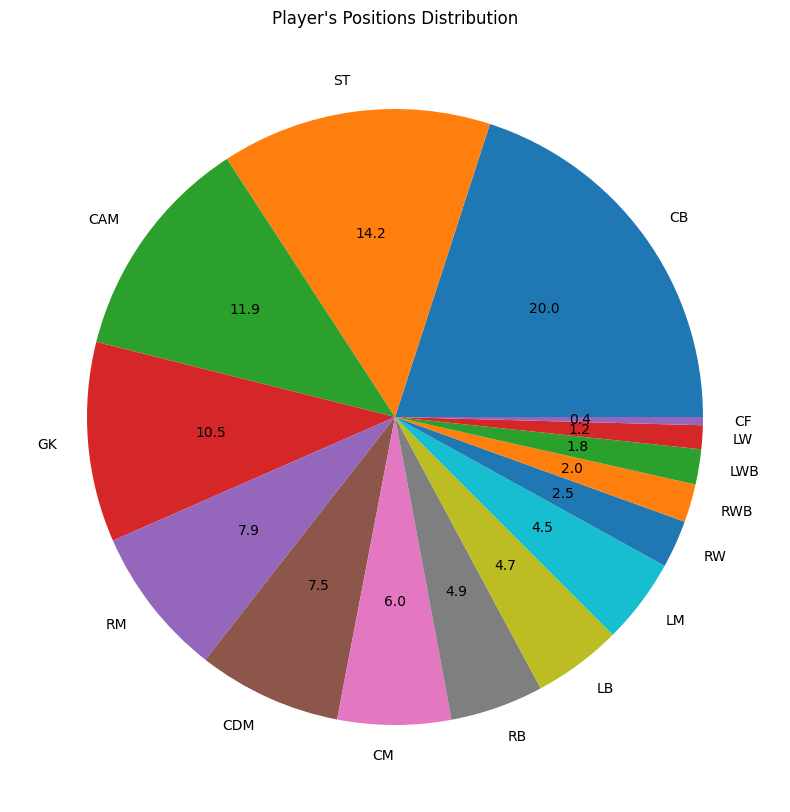

In [156]:
# Player's Positions Distribution pie chart

plt.figure(figsize=(10,10))
loc=df['Best position'].value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()

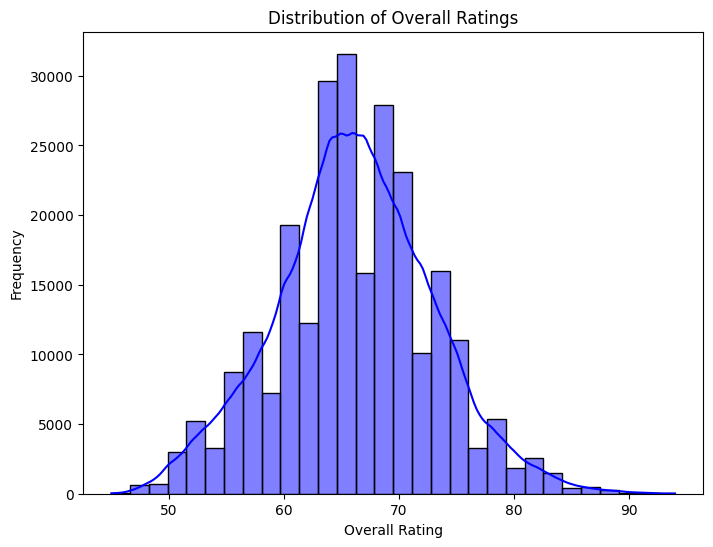

In [157]:
# Histogram for Overall rating

plt.figure(figsize=(8, 6))
sns.histplot(df['Overall rating'], kde=True, bins=30, color='blue')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

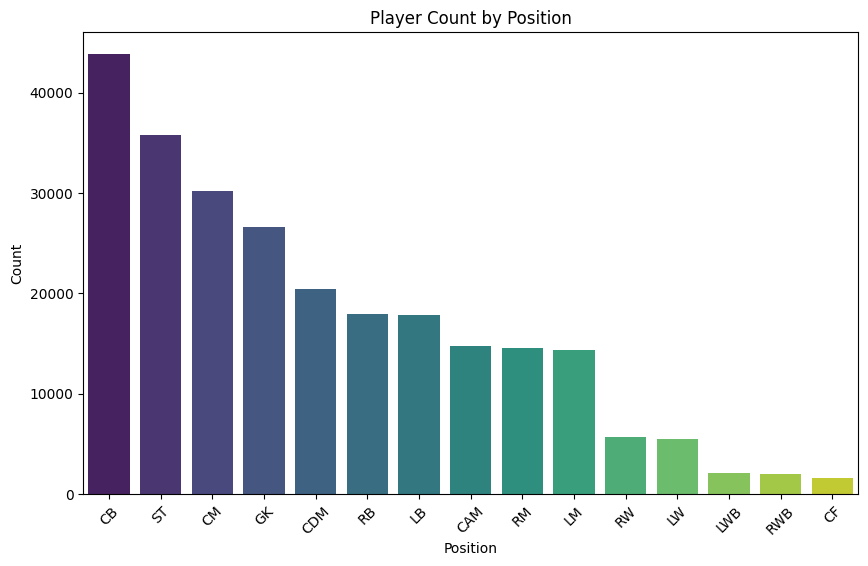

In [158]:
# Player Count by Position

plt.figure(figsize=(10, 6))
position_counts = df['Position'].value_counts()
sns.barplot(x=position_counts.index, y=position_counts.values, palette="viridis")
plt.title('Player Count by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

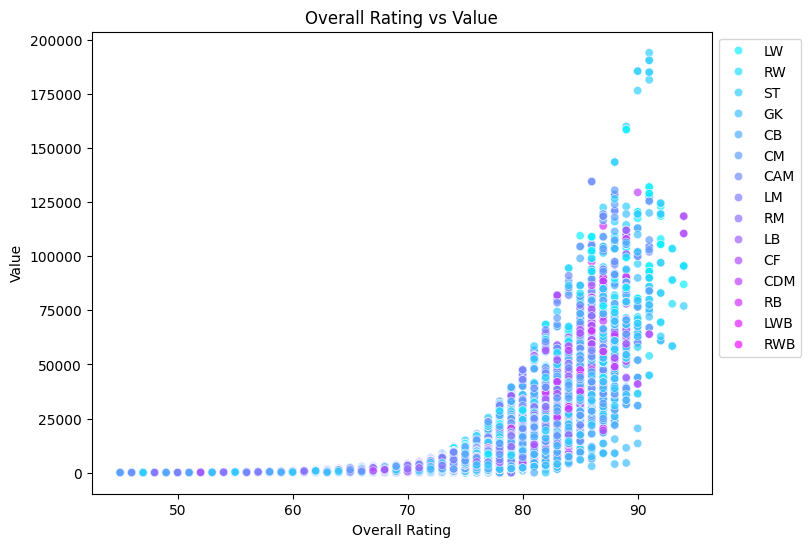

In [159]:
# Scatter Plot for Overall rating vs Value

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Overall rating', y='Value', hue='Position', palette='cool', alpha=0.7)
plt.title('Overall Rating vs Value')
plt.xlabel('Overall Rating')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## Encoding

##### Label Encoding

In [204]:
df_encoded = df

from sklearn.preprocessing import LabelEncoder

object_columns = ['Country', 'Position', 'Team Name',  'Best position','foot', 'Attacking work rate', 'Defensive work rate', 'Body type']

# Create a label encoder
label_encoder = LabelEncoder()

# Encode each object column
for col in object_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])


##### One-Hot Encoding

In [205]:
# object_columns = ['foot', 'Attacking work rate', 'Defensive work rate', 'Body type']
# df_encoded = pd.get_dummies(df_encoded, columns=object_columns)

In [206]:
df_encoded.sample(5)

,Name,Country,Position,Age,Overall rating,Potential,Team Name,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / pace,Physical / Positioning,Number of playstyles
222609,H. Trent,178,5,22,53,60,692,188,78,1,53,5,7,160,800,272,53,10,6,13,17,7,69,11,14,13,18,13,170,32,30,31,43,34,169,35,50,20,57,7,77,26,9,5,22,15,35,33,9,13,11,262,49,58,46,51,58,833,293,2,1,2,2,1,0,49,58,46,58,31,51,0
125868,Sun Weizhe,33,2,22,53,58,133,180,72,1,53,2,5,70,2000,114,219,36,40,54,52,37,248,52,40,49,52,55,297,65,67,66,43,56,272,43,69,64,59,37,225,50,47,49,47,32,41,163,53,53,57,68,16,14,15,10,13,1492,318,3,2,2,2,1,0,66,40,47,54,52,59,0
207353,M. Lowe,51,14,26,59,59,21,179,74,1,59,14,0,250,1000,438,262,43,60,56,52,51,242,56,47,38,44,57,350,75,76,74,57,68,316,56,76,61,68,55,238,46,27,58,50,57,55,89,33,32,24,45,11,6,9,6,13,1542,336,3,2,0,1,1,1,76,58,48,59,33,62,0
188306,O. Targhalline,114,4,19,62,78,653,186,71,1,64,4,16,1000,4000,2500,283,56,47,59,72,49,302,68,54,52,66,62,257,54,55,48,57,43,264,59,54,62,50,39,285,60,57,44,70,54,54,166,49,57,60,35,6,7,5,9,8,1592,341,3,2,2,2,1,0,55,48,66,62,55,55,0
199597,D. Kiki,17,6,28,67,67,782,180,75,0,67,6,0,925,4000,1200,277,62,47,62,62,44,272,65,52,37,57,61,351,75,79,72,59,66,343,64,82,83,72,42,267,70,59,52,48,38,60,188,58,66,64,60,7,15,13,14,11,1758,384,3,3,0,2,1,1,77,49,57,64,62,75,1


In [207]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253002 entries, 0 to 253001
Data columns (total 72 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Name                      253002 non-null  object
 1   Country                   253002 non-null  int32 
 2   Position                  253002 non-null  int32 
 3   Age                       253002 non-null  int64 
 4   Overall rating            253002 non-null  int64 
 5   Potential                 253002 non-null  int64 
 6   Team Name                 253002 non-null  int32 
 7   Height                    253002 non-null  int32 
 8   Weight                    253002 non-null  int32 
 9   foot                      253002 non-null  int32 
 10  Best overall              253002 non-null  int64 
 11  Best position             253002 non-null  int32 
 12  Growth                    253002 non-null  int64 
 13  Value                     253002 non-null  int32 
 14  Wage

In [208]:
# Select only numeric columns
numeric_columns = df_encoded.select_dtypes(include=['number'])

# correlation of target column with numeric columns
# Exclude self-correlation
correlations = numeric_columns.corr()['Value'].drop('Value')  
correlations.sort_values(ascending=False)

Release clause              0.938187
Wage                        0.806239
International reputation    0.598987
Best overall                0.584032
Overall rating              0.580265
Potential                   0.539675
Reactions                   0.509732
Base stats                  0.476393
Dribbling / Reflexes        0.404831
Passing / Kicking           0.404024
Composure                   0.400109
Number of playstyles        0.354335
Total Stats                 0.354133
Vision                      0.335857
Short passing               0.308612
Shooting / Handling         0.296586
Total power                 0.294970
Long passing                0.289843
Shot power                  0.288461
Total mentality             0.285533
Total skill                 0.284428
Ball control                0.282258
Total attacking             0.276514
Curve                       0.260247
Skill moves                 0.254700
Volleys                     0.249917
Dribbling                   0.248861
T

In [209]:
df_encoded.columns

Index(['Name', 'Country', 'Position', 'Age', 'Overall rating', 'Potential',
       'Team Name', 'Height', 'Weight', 'foot', 'Best overall',
       'Best position', 'Growth', 'Value', 'Wage', 'Release clause',
       'Total attacking', 'Crossing', 'Finishing', 'Heading accuracy',
       'Short passing', 'Volleys', 'Total skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long passing', 'Ball control', 'Total movement',
       'Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance',
       'Total power', 'Shot power', 'Jumping', 'Stamina', 'Strength',
       'Long shots', 'Total mentality', 'Aggression', 'Interceptions',
       'Att. Position', 'Vision', 'Penalties', 'Composure', 'Total defending',
       'Defensive awareness', 'Standing tackle', 'Sliding tackle',
       'Total goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base stats',
       'Weak foot', 'Skill moves', 'Attacking work rate',
       'Defensive 

In [210]:
print("Category to label mapping:")
for category, label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{category}: {label}")

Category to label mapping:
Lean: 0
Normal: 1
Stocky: 2
Unique: 3


## Data Splitting

In [211]:
# Columns to drop 
df_encoded.drop(columns=['Name', 'Country',
       'Team Name', 'foot', 'Best overall',
       'Best position', 'Growth', 'Wage',
       'Total attacking', 'Crossing', 'Finishing', 'Heading accuracy',
       'Short passing', 'Volleys', 'Total skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long passing', 'Ball control', 'Total movement',
       'Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance',
       'Total power', 'Shot power', 'Jumping', 'Stamina', 'Strength',
       'Long shots', 'Total mentality', 'Aggression', 'Interceptions',
       'Att. Position', 'Vision', 'Penalties', 'Composure', 'Total defending',
       'Defensive awareness', 'Standing tackle', 'Sliding tackle',
       'Total goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Base stats',
       'Weak foot', 'Skill moves', 'Attacking work rate',
       'Defensive work rate', 'Body type',
       'Pace / Diving', 'Shooting / Handling', 'Passing / Kicking',
       'Dribbling / Reflexes', 'Defending / pace', 'Physical / Positioning',], inplace=True)

In [212]:
df_encoded.head(2)

,Position,Age,Overall rating,Potential,Height,Weight,Value,Release clause,Total Stats,International reputation,Number of playstyles
0,8,31,94,94,185,80,87000,0,2223,5,4
1,12,29,93,93,170,72,89000,0,2155,5,6


In [213]:
df_encoded.duplicated().sum()

8179

In [214]:
df_encoded = df_encoded.drop_duplicates()

In [215]:
df_encoded.duplicated().sum()

0

In [216]:
# Independent columns 
X_columns = ['Release clause', 'International reputation', 'Overall rating',
            'Potential','Number of playstyles','Total Stats', 'Age',
            'Weight', 'Height', 'Position']  

# Dependent column
y_column = 'Value'  

In [217]:
#split the data into training and testing
X = df_encoded[X_columns]
y = df_encoded[y_column]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=12345)

## Model Building

### Linear Regression

In [255]:
from sklearn.linear_model import LinearRegression

def linear_regression():
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

### Ridge Regression

In [256]:
from sklearn.linear_model import Ridge

def ridge_regression():
    model = Ridge()
    model.fit(X_train, y_train)
    return model

### lasso_regression

In [257]:
from sklearn.linear_model import Lasso

def lasso_regression():
    model = Lasso()
    model.fit(X_train, y_train)
    return model

### Decision Tree

In [258]:
from sklearn.tree import DecisionTreeRegressor

def decision_tree():
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    return model

### Random Forest

In [259]:
from sklearn.ensemble import RandomForestRegressor

def random_forest():
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X_train, y_train)
    return model

### XGBoost

In [260]:
from xgboost import XGBRegressor

def xgboost():
    model = XGBRegressor()
    model.fit(X_train, y_train)
    return model

## Model Evaluation

In [261]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation Function
def evaluate_models(models, X_test, y_test):

    results = []

    for name, model in models.items():
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Append results
        results.append({
            "Model": name,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R² Score": r2
        })

    
    # Convert results to DataFrame
    return pd.DataFrame(results)


In [262]:
models = {
    "Linear Regression": linear_regression(),
    "Ridge Regression": ridge_regression(),
    "Lasso Regression": lasso_regression(),
    "Decision Tree": decision_tree(),
    "Random Forest": random_forest(),
    "XGBoost": xgboost()
}

# Evaluate all models
evaluation_results = evaluate_models(models, X_test, y_test)

# Display results in tabular form
evaluation_results

,Model,MAE,MSE,RMSE,R² Score
0,Linear Regression,861.589238,3.918590e+06,1979.542805,0.914231
1,Ridge Regression,861.587078,3.918586e+06,1979.541870,0.914231
2,Lasso Regression,861.173207,3.918324e+06,1979.475592,0.914237
3,Decision Tree,196.739431,6.736197e+05,820.743385,0.985256
4,Random Forest,175.999760,3.519163e+05,593.225296,0.992297
5,XGBoost,256.485324,7.488134e+05,865.340058,0.983610


## Model Evaluation with With kfold

#### Kfold

In [235]:
# K-Fold Cross-Validation Function
from sklearn.model_selection import KFold, cross_val_score

def cross_validate_model(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=12345)
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    return scores.mean(), scores.std()

In [236]:
# Regression Models
def build_models():
    return {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Decision Tree": DecisionTreeRegressor(random_state=12345),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=12345),
        "XGBoost": XGBRegressor(random_state=12345)
    }

In [237]:
# Initialize Models
models = build_models()

# Perform Cross-Validation and Store Results
results = []
for name, model in models.items():
    mean_r2, std_r2 = cross_validate_model(model, X, y)
    results.append({"Model": name, "Mean R²": mean_r2, "Std R²": std_r2})

# Convert Results to DataFrame and Display
results_df = pd.DataFrame(results)
print(results_df)

               Model   Mean R²    Std R²
0  Linear Regression  0.910937  0.007564
1   Ridge Regression  0.910937  0.007564
2   Lasso Regression  0.910937  0.007571
3      Decision Tree  0.984516  0.000646
4      Random Forest  0.991871  0.000613
5            XGBoost  0.982528  0.002832


#### Cross Validation Curve

In [239]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, validation_curve

# Validation Curve Function
def plot_validation_curve(model, X, y, param_name, param_range, model_name):
    train_scores, val_scores = validation_curve(
        model, X, y, param_name=param_name, param_range=param_range, cv=5, scoring='r2'
    )
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(param_range, train_mean, label='Training Score', color='blue')
    plt.plot(param_range, val_mean, label='Validation Score', color='orange')
    plt.title(f'Validation Curve for {model_name}')
    plt.xlabel(param_name)
    plt.ylabel('R² Score')
    plt.legend()
    plt.grid()
    plt.show()


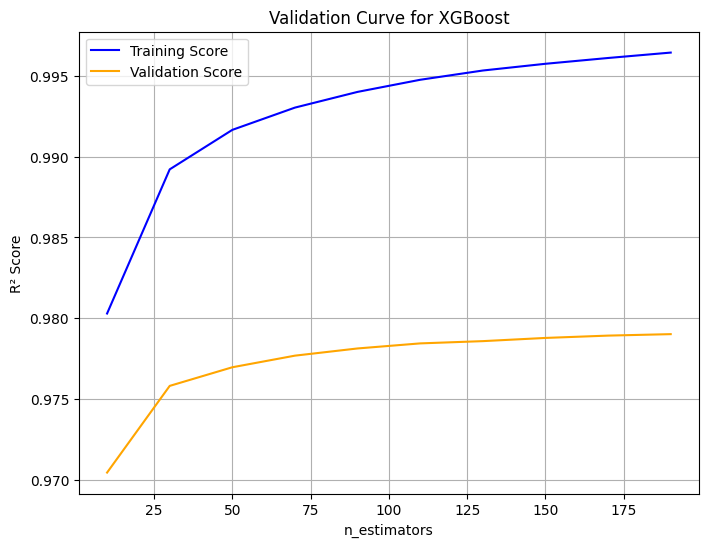

In [240]:
# Plot Validation Curve for XGBoost
plot_validation_curve(
    XGBRegressor(random_state=12345), 
    X_train, 
    y_train, 
    "n_estimators", 
    range(10, 201, 20), 
    "XGBoost"
)

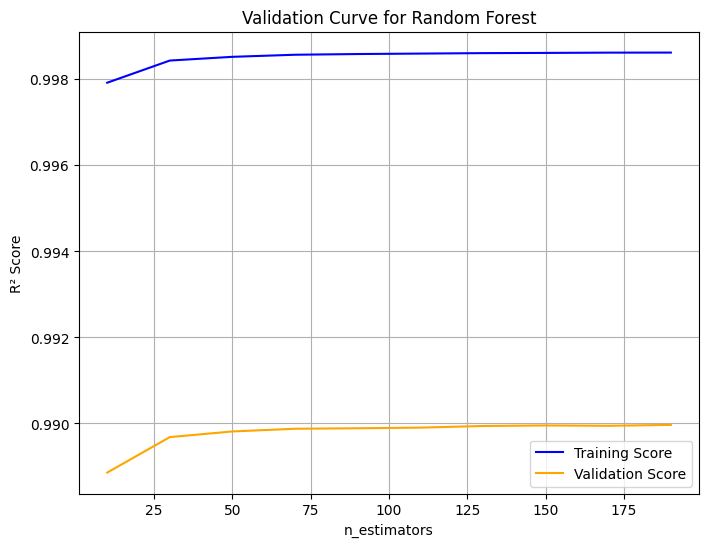

In [241]:
# Plot Validation Curve for Random Forest
plot_validation_curve(
    RandomForestRegressor(random_state=12345), 
    X_train, 
    y_train, 
    "n_estimators", 
    range(10, 201, 20), "Random Forest"
)

### PCA

In [244]:
# Independent columns 
X_columns = ['Release clause', 'International reputation', 'Overall rating',
            'Potential','Number of playstyles','Total Stats', 'Age',
            'Weight', 'Height', 'Position']  

# Dependent column
y_column = 'Value'  

In [245]:
#split the data into training and testing
X = df_encoded[X_columns]
y = df_encoded[y_column]

#### decompose Columns

In [246]:
from sklearn.decomposition import PCA

# create an object
pca = PCA(n_components=1)

# fit the x having 2 columns
pca.fit(X)

# extract one component
x_new = pca.transform(X)

In [247]:
# split data into train and test
from sklearn.model_selection import train_test_split

x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_new, y, train_size=0.7, random_state=1234)

#### Train Model

In [248]:
from sklearn.linear_model import LinearRegression

# create model
model = LinearRegression()

# train the model
model.fit(x_train_p, y_train_p)

LinearRegression()

#### Visualization

In [249]:
y_pred = model.predict(x_test_p)

Text(0.5, 1.0, 'Market value prediction')

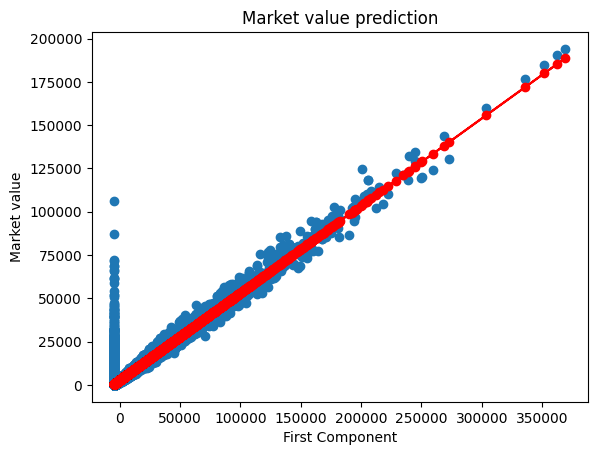

In [251]:
plt.scatter(x_test_p[:, 0], y_test_p)
plt.scatter(x_test_p[:, 0], y_pred, color="red")
plt.plot(x_test_p[:, 0], y_pred, color="red", label="Best fit Regression Line")
plt.xlabel('First Component')
plt.ylabel('Market value')
plt.title('Market value prediction')

#### Evaluate the model

In [252]:
y_true = y_test_p
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"mae = {mae}")
print(f"mse = {mse}")
print(f"rmse = {rmse}")
print(f"r2 = {r2}")

mae = 847.3046409358518
mse = 5322946.289011678
rmse = 2307.151119673715
r2 = 0.8830176453527274


## Pickle file

In [253]:
model = xgboost()

In [254]:
import pickle
with open("xgboost_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully as xgboost_model.pkl")

Model saved successfully as xgboost_model.pkl
